# Esercizio 08.1

Ho scritto un codice che sfrutta l'algoritmo di Metropolis per campionare la densità di probabilità richiesta. Attraverso la funzione "H_psi_over_psi", viene calcolata l'energia associata ad ogni punto che viene campionato. Si sfruttano tutti i contributi calcolati all'interno di un singolo blocco per calcolare il valore di aspettazione dell'energia e, unendo i risultati di tanti blocchi, l'incertezza statistica.

# Esercizio 08.2

Dopo un po' di prove, ho mappato lo spazio dei parametri $\mu$ e $\sigma$ con una griglia di 50x50 punti nel dominio [0.45,0.95]x[0.45,0.95]. Per ognuno dei 50x50 punti ho prima eseguito l'equilibrazione del Metropolis con 1000 step Monte Carlo, e poi ho stimato l'energia campionando la distribuzione $p_{\mu,\sigma}$ in questione. Per ogni stima dell'energia ho usato 200 blocchi da 10000 step ciascuno (questa è stata la simulazione più onerosa del corso, per come l'ho impostata). Ho plottato i valori di energia trovati in funzione di $\mu$ e $\sigma$ con un grafico 3D nello specchietto sottostante. Aggiungendo il comando "%matplotlib qt" si apre una finestra interattiva che permette di ruotare il grafico tridimensionale, e che può essere molto utile nella visualizzazione.

Text(0.5, 0, 'energy')

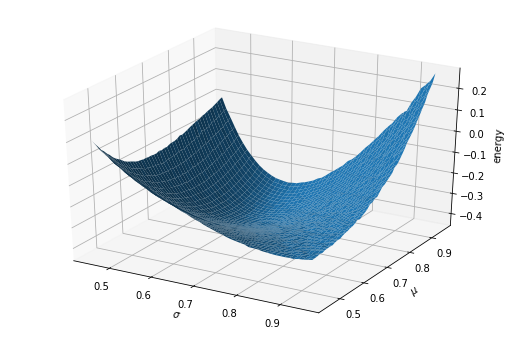

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

filename = "esercizio08.2_1/energy mapping 1/energy_mapping.dat"

data_en = np.loadtxt(filename)

centrex = 0.7 #sigma
centrey = 0.7 #mu
spacingx = 0.01
spacingy = 0.01
npunti = 50

inx = centrex-npunti*spacingx/2
finx = centrex+npunti*spacingx/2
iny = centrey-npunti*spacingy/2
finy = centrey+npunti*spacingy/2

x = np.linspace(inx, finx, npunti)
y = np.linspace(iny, finy, npunti)

# create grid
X, Y = np.meshgrid(x, y)

# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.plot_surface(X, Y, data_en)
#ax.contour3D(X, Y, data_en, 150, cmap = 'viridis')
# set labels
ax.set_xlabel('$\sigma$')
ax.set_ylabel('$\mu$')
ax.set_zlabel('energy')

Ho ripetuto l'operazione centrandomi più finemente sul minimo:

Text(0.5, 0, 'energy')

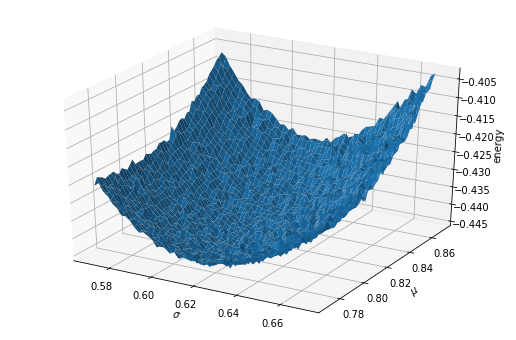

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

filename = "esercizio08.2_1/energy mapping 2/energy_mapping.dat"

data_en = np.loadtxt(filename)

centrex = 0.62 #sigma
centrey = 0.82 #mu
spacingx = 0.002
spacingy = 0.002
npunti = 50

inx = centrex-npunti*spacingx/2
finx = centrex+npunti*spacingx/2
iny = centrey-npunti*spacingy/2
finy = centrey+npunti*spacingy/2

x = np.linspace(inx, finx, npunti)
y = np.linspace(iny, finy, npunti)

# create grid
X, Y = np.meshgrid(x, y)

# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.plot_surface(X, Y, data_en)
#ax.contour3D(X, Y, data_en, 100, cmap = 'viridis')
# set labels
ax.set_xlabel('$\sigma$')
ax.set_ylabel('$\mu$')
ax.set_zlabel('energy')

Giunti a questo punto, il rumore del calcolo impedisce di raffinare uteriormente la stima.

Ho usato i due parametri $\sigma = 0.62$ e $\mu = 0.80$ (valori ottimizzati) per svolgere l'analisi successiva. Di seguito riporto il grafico della stima dell'energia in funzione del numero di blocchi. Si può notare come tale stima sia maggiore rispetto all'energia calcolata mediante la trasformazione dell'equazione di Schrodinger in equazione matriciale. Quest'ultimo si rivela un metodo molto preciso e lo riprenderò negli esercizi successivi.

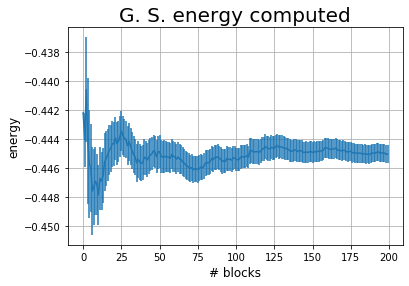

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

filename = "esercizio08.2_1/energy.dat"
en = np.loadtxt(filename, usecols = 0)
en_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(en))

plt.errorbar(blocks, en, yerr = en_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('energy', fontsize = 12)
  
plt.title('G. S. energy computed', fontsize = 20)
plt.grid(True)
plt.show()

Di seguito plotto l'istogramma della densità di probabilità campionata:

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


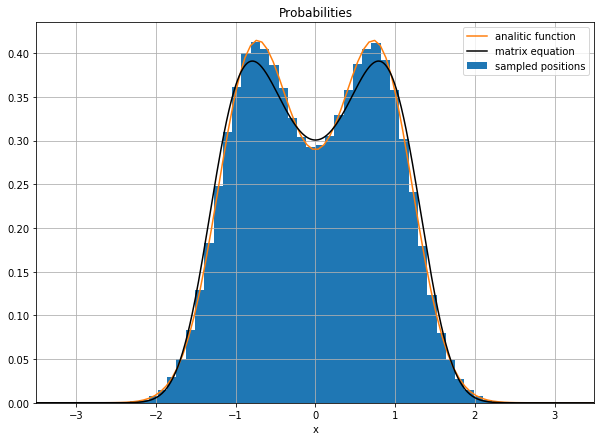

In [4]:
import math
from scipy.integrate import trapz

#histogram of the sampled positions
filename = "esercizio08.2_1/positions.dat"
pos = np.loadtxt(filename, usecols = 0)

plt.figure(figsize=(10,7))
plt.hist(pos, 50, density=True, label="sampled positions")

#analitical function
mu = 0.8
sigma = 0.62

ax = -3.5
bx = 3.5
x = np.linspace(ax,bx,100)
y = 1./(2*np.exp(-((mu/sigma)**2))*np.sqrt(math.pi)*sigma+2*(np.sqrt(math.pi))*sigma)*(np.exp(-(mu-x)**2/(2*sigma**2))+np.exp(-(mu+x)**2/(2*sigma**2)))**2

plt.plot(x,y, label="analitic function")

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.title("Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((ax,bx))

plt.legend()
plt.show()

Notiamo come l'istogramma  segua fedelmente l'andamento della funzione densità di probabilità richiesta (arancione), sintomo del fatto che l'algoritmo di Metropolis funziona correttamente. Possiamo osservare che la densità di probabilità del vero stato fondamentale si comunque leggermente diversa da quella che ho ottimizzato io. Analiticamente la funzione d'onda è diversa, non è la somma di due gaussiane.

# Esercizio 08.3

Di seguito mostro ili risultato della prima simulazione che ho eseguito con il codice Quantum Monte Carlo, usando la funzione da me ottimizzata negli esercizi precedenti. Ho usato una propagazione pari a 8.0 unità di tempo immaginario. Come si nota la funzione d'onda, che non corrisponde esattamente al ground state, è stata efficacemente proiettata su quest'ultimo.

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


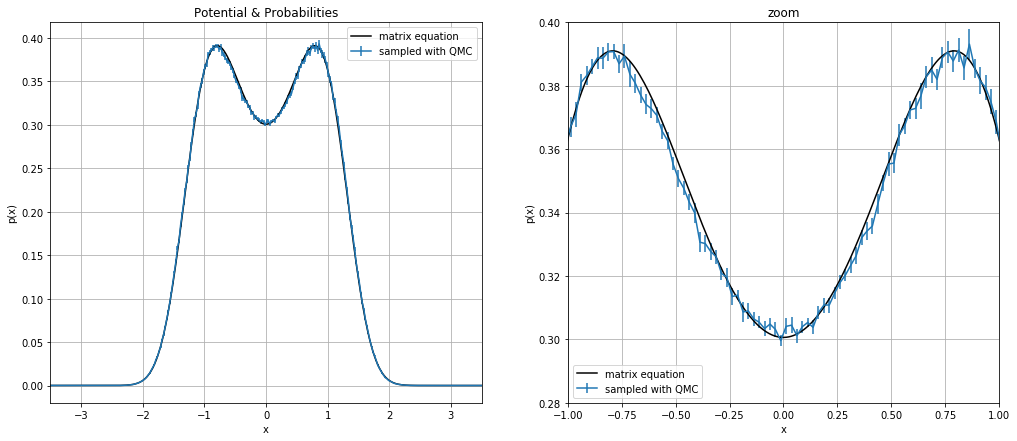

In [5]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)

plt.subplot(1,2,1)
#histogram of the sampled positions
filename = "QMC_results/simulazione8/probability.dat"
prob = np.loadtxt(filename)

plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.title("Probabilities")
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.xlim((ax,bx))
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.xlim((-1,1))
plt.ylim((0.28, 0.40))
plt.title('zoom')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)

plt.show()

-0.4551193669666666


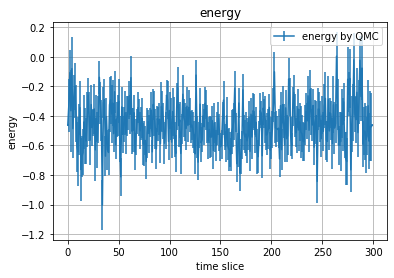

In [45]:
filename = "QMC_results/simulazione8/kinetic.dat"
en_k = np.loadtxt(filename)
filename = "QMC_results/simulazione8/potential.dat"
en_p = np.loadtxt(filename)

en = en_p[:,1]+en_k[:,1]
en_err = []
for i in range(np.size(en)):
    en_err.append(np.sqrt(en_p[i,2]**2+en_k[i,2]**2))

en_mean = np.mean(en[:])
print(en_mean)

plt.errorbar(en_k[:,0],en, yerr=en_err, label="energy by QMC")
plt.title('energy')
plt.xlabel('time slice')
plt.ylabel('energy')
plt.legend()
plt.grid(True)

plt.show()

Ora conduco un po' euristicamente una "ricerca binaria" del valore del tempo immaginario al quale si inizia a notare la mancanza di accordo con la distribuzione di probabilità vera del ground state. Inizio col portare il tempo immaginario a 0.1:

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


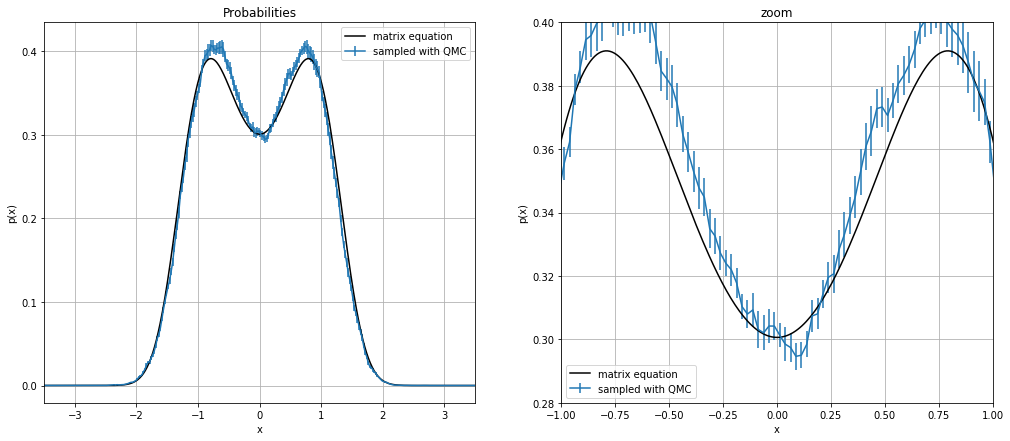

In [43]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)

plt.subplot(1,2,1)
#histogram of the sampled positions
filename = "QMC_results/simulazione01/probability.dat"
prob = np.loadtxt(filename)

plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.title("Probabilities")
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.xlim((ax,bx))
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.xlim((-1,1))
plt.ylim((0.28, 0.40))
plt.title('zoom')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)

plt.show()

-0.39418410229999995


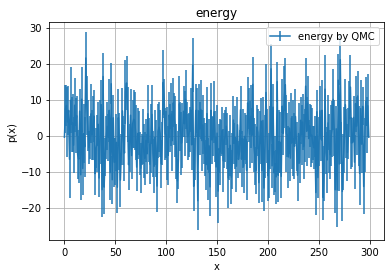

In [44]:
filename = "QMC_results/simulazione01/kinetic.dat"
en_k = np.loadtxt(filename)
filename = "QMC_results/simulazione01/potential.dat"
en_p = np.loadtxt(filename)

en = en_p[:,1]+en_k[:,1]
en_err = []
for i in range(np.size(en)):
    en_err.append(np.sqrt(en_p[i,2]**2+en_k[i,2]**2))

en_mean = np.mean(en[:])
print(en_mean)

plt.errorbar(en_k[:,0],en, yerr=en_err, label="energy by QMC")
plt.title('energy')
plt.xlabel('time slice')
plt.ylabel('energy')
plt.legend()
plt.grid(True)

plt.show()

Si nota bene come la funzione d'onda proiettata sia ancora molto simile a quella ottimizzata da me, e anche che si discosta notevolmente dal vero ground state, in nero. L'energia è aumentata sensibilmente. Portiamo il tempo immaginario a 0.9 e successivamente a 0.7:

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


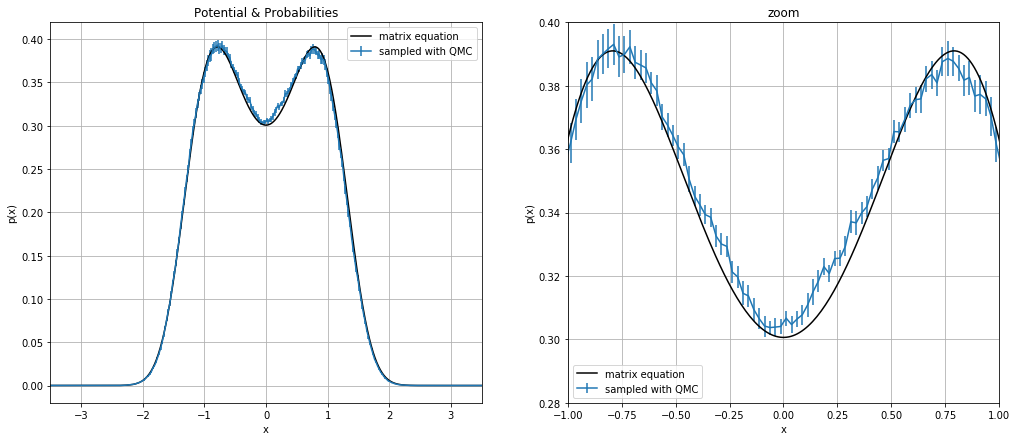

In [9]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)

plt.subplot(1,2,1)
#histogram of the sampled positions
filename = "QMC_results/simulazione09/probability.dat"
prob = np.loadtxt(filename)

plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.title("Probabilities")
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.xlim((ax,bx))
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.xlim((-1,1))
plt.ylim((0.28, 0.40))
plt.title('zoom')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)

plt.show()

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


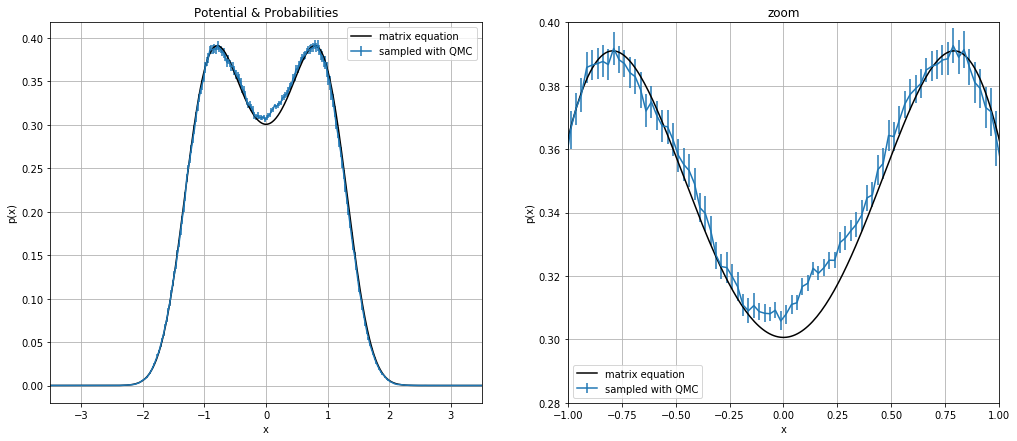

In [11]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)

plt.subplot(1,2,1)
#histogram of the sampled positions
filename = "QMC_results/simulazione07/probability.dat"
prob = np.loadtxt(filename)

plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.title("Probabilities")
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.xlim((ax,bx))
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.xlim((-1,1))
plt.ylim((0.28, 0.40))
plt.title('zoom')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)

plt.show()

Possiamo dire che a 0.9 inizia ad esserci un minimo scostamento dalla funzione vera.

Cosa succede se usiamo la funzione uniforme come funzione di partenza dell'algoritmo?

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


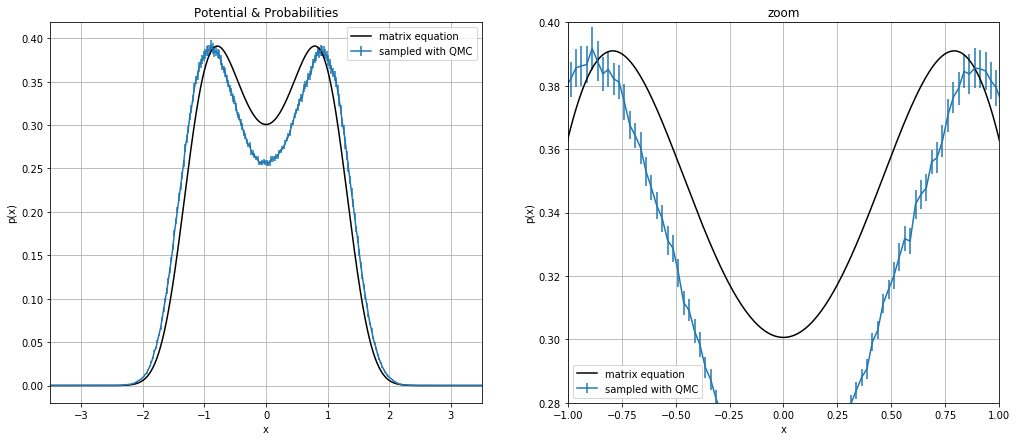

In [12]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)

plt.subplot(1,2,1)
#histogram of the sampled positions
filename = "QMC_results/simulazione09unif/probability.dat"
prob = np.loadtxt(filename)

plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.title("Probabilities")
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.xlim((ax,bx))
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.xlim((-1,1))
plt.ylim((0.28, 0.40))
plt.title('zoom')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)

plt.show()

La funzione d'onda campionata è decisamente diversa da quella del ground state! E' evidente che partire dalla funzione d'onda ottimizzata è favorevole, perché la componente di ground state è già in partenza molto maggiore in quest'ultima, e dunque la proiezione converge al ground state vero molto più velocemente. Dopo qualche prova ho notato che attorno a un tempo immaginario pari a 4 si ottiene comunque il campionamento del ground state, anche partendo dalla funzione costante:

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


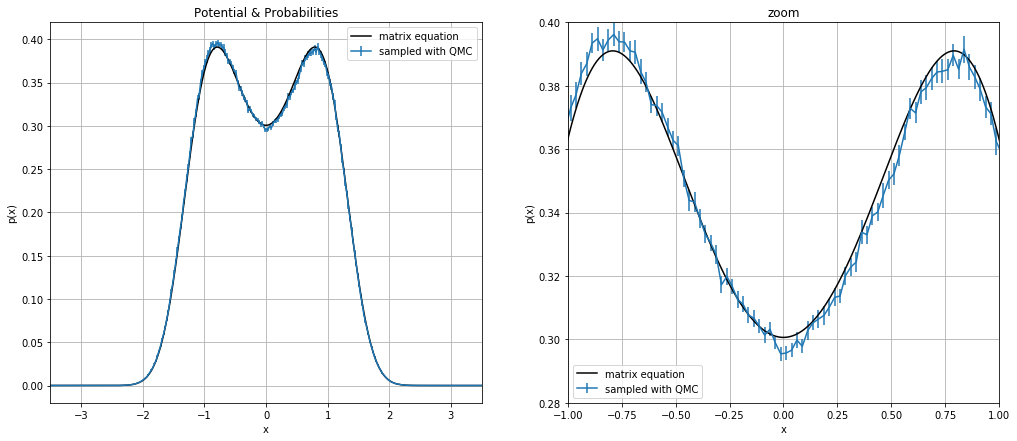

In [14]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)

plt.subplot(1,2,1)
#histogram of the sampled positions
filename = "QMC_results/simulazione4unif/probability.dat"
prob = np.loadtxt(filename)

plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.title("Probabilities")
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.xlim((ax,bx))
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC")
plt.plot(x,(psi[0])**2, label = "matrix equation", color = 'k')
plt.xlim((-1,1))
plt.ylim((0.28, 0.40))
plt.title('zoom')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)

plt.show()

Usando la funzione d'onda ottimizzata abbiamo ridotto il tempo immaginario necessario di circa 4 volte.

Per finire, provo ad alzare la temperatura:

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


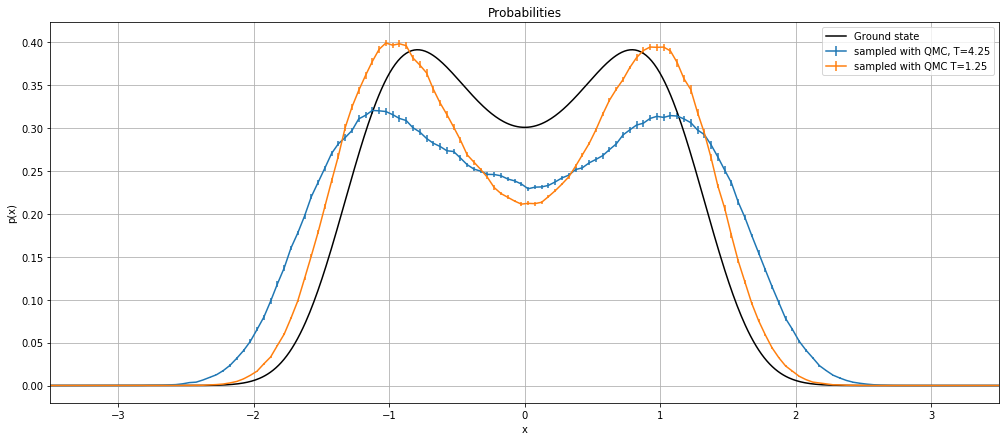

In [25]:
f = plt.figure()
f.set_figwidth(17)
f.set_figheight(7)

#histogram of the sampled positions
filename = "QMC_results/simulazioneT4_25/probability.dat"
prob = np.loadtxt(filename)

plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC, T=4.25")

#histogram of the sampled positions
filename = "QMC_results/simulazioneT1_25/probability.dat"
prob = np.loadtxt(filename)

plt.errorbar(prob[:,0],prob[:,1], yerr=prob[:,2], label="sampled with QMC T=1.25")

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2, label = "Ground state", color = 'k')
plt.title("Probabilities")
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.xlim((ax,bx))
plt.legend()

plt.show()

Alzando la temperatura vengono popolati maggiormente gli stati eccitati per cui la funzione d'onda tende a delocalizzarsi maggiormente. Ad alte temperature mi aspetto che i due picchi, che derivano dalla presenza dei due minimi nella buca, siano sempre meno evidenti e infine scompaiano.